# NAVGEM Data

This demonstrates how to use public data from the NAVGEM model from NOMADS or GODAE.

> Note: there are not .idx files provided, so you have to download the full file and generate the .idx file with wgrib2 (requires Linux).

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie("2024-01-18", model="navgem_nomads")

✅ Found ┊ model=navgem_nomads ┊ product=none ┊ 2024-Jan-18 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


In [3]:
H.PRODUCTS

{'none': ''}

In [4]:
H.SOURCES

{'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/fnmoc/prod/navgem.20240118/navgem_2024011800f000.grib2'}

In [5]:
# no index file available. Have to download the full file.
H.download()

PosixPath('/p/cwfs/blaylock/data/navgem_nomads/20240118/navgem_2024011800f000.grib2')

In [6]:
# Since we have download the full file and don't have an index,
# we need to filter by keys to open the variable we want.

ds = H.xarray(
    backend_kwargs={
        "filter_by_keys": {"shortName": "2t", "typeOfLevel": "heightAboveGround"}
    },
)
ds

/p/home/blaylock/BB_python/Herbie/herbie/core.py:1064: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset>
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 2024-01-18
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           datetime64[ns] ...
Data variables:
    t2m                  (latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_nomads
    product:                 none
    description:             Navy Global Environment Model
    remote_grib:             /p/cwfs/blaylock/data/navgem_nomads/20240118/nav...
    local_grib:              /p/cwfs/blaylock/data/navgem_nomads/20240118/nav...
    searchString:            None

Text(0.0, 1.0, 'NAVGEM_NOMADS: 00:00 UTC 18 Jan 2024')

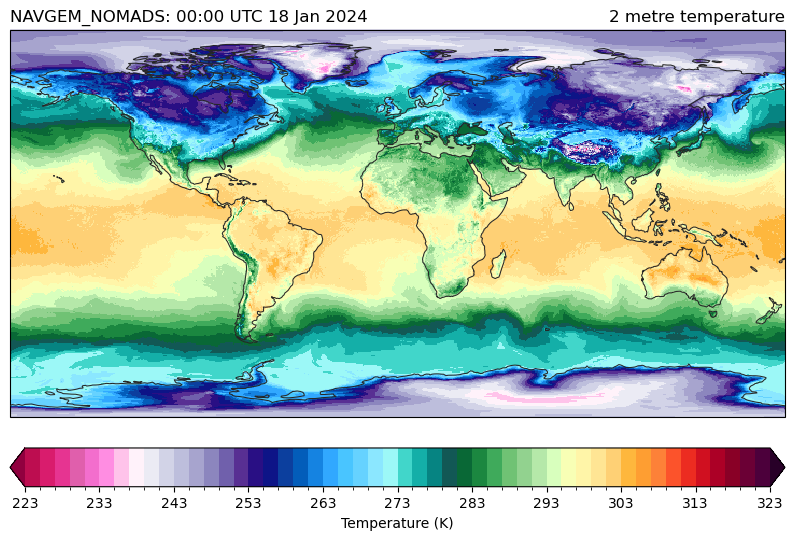

In [14]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(
    f'{H.model.upper()}: {ds.time.dt.strftime("%H:%M UTC %d %b %Y").item()}', loc="left"
)

In [15]:
from herbie import wgrib2

In [ ]:
wgrib2.